# Project Description

In this project, we take on the role of a financial analyst working for a hedge fund. Our manager is interested in evaluating the profitability and leverage of companies from different industries - specifically technology (tech), fast-moving consumer goods (fmcg) and real estate (real_est). 


# Purpose of Analysis

The main goal is to assess whether highly leveraged real estate companies tend to be more profitable, which will guide potential investment decisions in the real estate sector.

Investigate the relationship between leverage and profitability specifically in the real estate sector, to determine if the correlation is positive, negative, or if there is no clear relationship.

To support this analysis, we are provided with two datasets:

* Balance_Sheet.xlsx - Contains company-level balance sheet data, including liabilities and equity.

* Income_Statement.xlsx - Contains company-level income statement data, including revenue and income.


           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


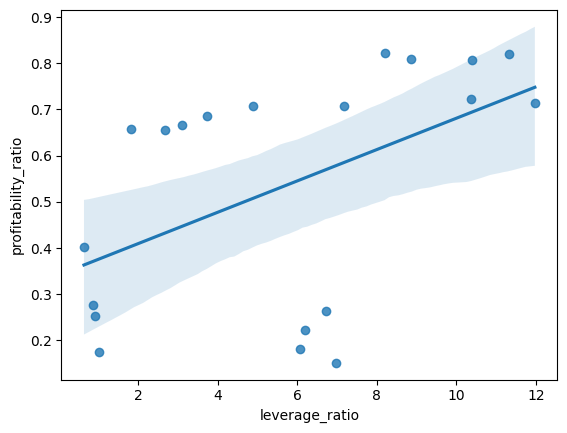

In [4]:
# Import python package
import numpy as np
import pandas as pd
import seaborn as sns

# Read in the data
balance_sheet = pd.read_excel('../input/financial-reports/Balance_Sheet.xlsx')
income_statement = pd.read_excel('../input/financial-reports/Income_Statement.xlsx')

# Merge both the dataframes and name it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we are providing the code to compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"
